### **Package Importing, Loading, Previewing, and Cleaning the Data** 

In [72]:
#package import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



import warnings
warnings.filterwarnings('ignore')


In [73]:
# loading and previewing data
df = pd.read_csv('data/food_sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [75]:
# cleaning data
df.duplicated().sum()

0

In [76]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [77]:
# dropping unneccessary data
df.drop(columns=['Item_Identifier'], inplace=True)

In [78]:
# correcting inconsistencies in data 
df.value_counts()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type              Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
4.555        Regular           0.034329         Frozen Foods           110.1544  OUT013             1987                       High         Tier 3                Supermarket Type1  1230.3984            1
15.700       Regular           0.030625         Snack Foods            252.2724  OUT046             1997                       Small        Tier 1                Supermarket Type1  1258.3620            1
             Low Fat           0.045166         Frozen Foods           178.6660  OUT013             1987                       High         Tier 3                Supermarket Type1  2516.7240            1
                               0.037290         Soft Drinks            182.7634  OUT049             1999                       Medium       Tier 1                Supermarket Type1  3453.504

In [79]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [80]:
df.replace(to_replace= {'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}}, inplace=True)

### **Exploratory Visual Analysis** 


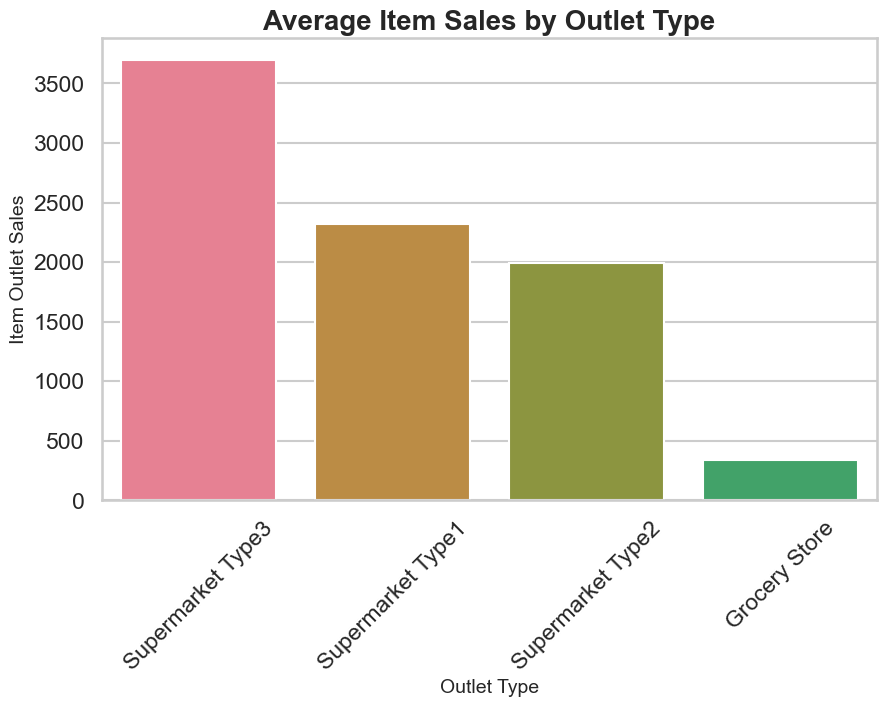

In [81]:
sns.set_style("whitegrid")
sns.set_context("talk")

palette = sns.color_palette("husl", 8)
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
df_sorted = df.groupby('Outlet_Type', as_index=False).mean().sort_values('Item_Outlet_Sales', ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df_sorted, x='Outlet_Type', y='Item_Outlet_Sales', palette=palette, errorbar=None)

ax.set_title("Average Item Sales by Outlet Type", fontsize=20, fontweight='bold')
ax.set_xlabel('Outlet Type', fontsize=14)
ax.set_ylabel('Item Outlet Sales', fontsize=14)

plt.xticks(rotation=45)
plt.show()

**Insight:** The visualization presented provides a comprehensive overview of the average sales performance categorized by outlet type. We can see distinct differences in performance across our retail formats.

Our 'Supermarket Type3' outlets are leading in sales with an average of $3694.04, significantly outperforming all other outlet types. The second best performing outlet type is 'Supermarket Type1', achieving an average sales of $2316.18, while 'Supermarket Type2' outlets register slightly lower with an average of $1995.50.

In contrast, 'Grocery Store' outlets have considerably lower sales, with an average of just $339.83. This could be an area requiring strategic attention to improve sales performance.

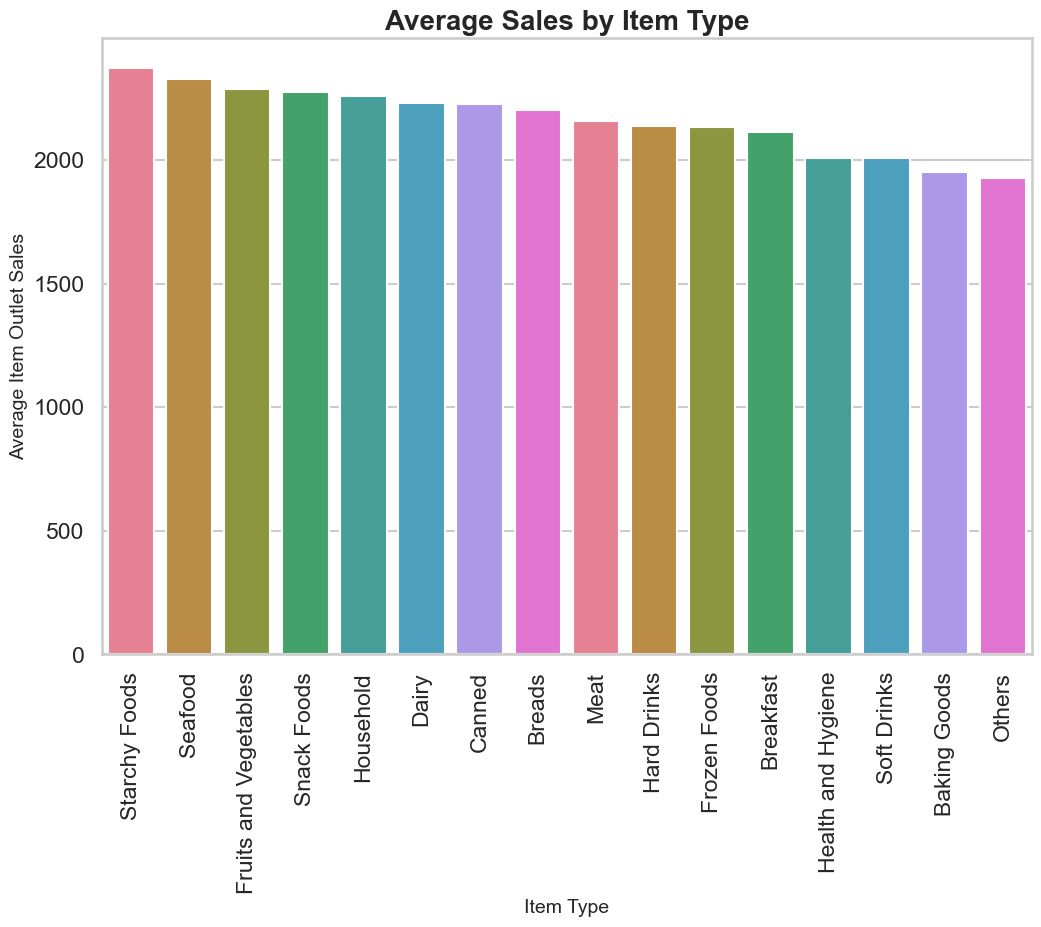

In [82]:
sns.set_style("whitegrid")
sns.set_context("talk")

df_sorted = df.groupby('Item_Type', as_index=False).mean().sort_values('Item_Outlet_Sales', ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))
barplot = sns.barplot(data=df_sorted, x='Item_Type', y='Item_Outlet_Sales', palette=palette, errorbar=None)

ax.set_title('Average Sales by Item Type', fontsize=20, fontweight='bold')
ax.set_xlabel('Item Type', fontsize=14)
ax.set_ylabel('Average Item Outlet Sales', fontsize=14)

plt.xticks(rotation=90)
plt.show()


**Insight:** The presented visualization offers an in-depth perspective on average sales across diverse item categories in our stores. It distinctly outlines the sales performance for each type of item.

On observing the sales figures, 'Starchy Foods' emerge as the top-performing category with average sales reaching $2374.33. This is closely followed by 'Seafood', averaging at $2326.07. 'Fruits and Vegetables', 'Snack Foods', and 'Household' items also display strong sales performances, achieving averages of 2289.01, 2277.32, and 2258.78 units respectively.

Categories like 'Breads', 'Canned', 'Dairy', and 'Meat' maintain a similar average sales figure, ranging between $2158.98 and $2225.19. This might indicate shared consumer preferences or similar pricing strategies across these categories.

Conversely, 'Baking Goods' and 'Others' fall on the lower end of the spectrum, with sales averaging at $1952.97 and $1926.14 respectively. Furthermore, 'Soft Drinks' and 'Health and Hygiene' categories also depict lower averages, registering $2006.51 and $2010.00 respectively.

These trends suggest potential opportunities to boost sales in the underperforming categories through strategic marketing and pricing initiatives.

### **Preprocessing Data**

In [83]:
# choosing target vectors and features
y = df['Item_Outlet_Sales']
X = df.drop(columns='Item_Outlet_Sales')


In [84]:
# splitting data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [85]:
# instantiating imputers 
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='median')

In [86]:
# create data pipelines with column transformers
num_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline(freq_imputer, ohe)

num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

preprocessor = make_column_transformer(cat_tuple, num_tuple, remainder='drop')

### **ML Models**

In [87]:
# linear regression model
lin_reg = LinearRegression()
lin_reg_pipe = make_pipeline(preprocessor, lin_reg)

lin_reg_pipe.fit(X_train, y_train);

In [88]:
# decision tree model
dec_tree = DecisionTreeRegressor(random_state=42)
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)

dec_tree_pipe.fit(X_train, y_train);

In [89]:
# tuning decision tree regressor 

max_depth = [i for i in range(1, 11, 1)]
min_samples_leaf = [i for i in range(1,21, 2)]
min_samples_split = [i for i in range(2,100,2)]

dec_tree_param_grid = {
    'decisiontreeregressor__max_depth': max_depth,
    'decisiontreeregressor__min_samples_leaf': min_samples_leaf,
    'decisiontreeregressor__min_samples_split': min_samples_split
}

In [90]:
dec_tree_grid_search = GridSearchCV(dec_tree_pipe, dec_tree_param_grid)
dec_tree_grid_search.fit(X_train, y_train)

dec_tree_best_model = dec_tree_grid_search.best_estimator_
dec_tree_best_model.fit(X_train, y_train);

In [91]:
# function creation to assess model performance and return r^2 and RMSE training and testing scores
def model_performance(pipe, x_train, y_train, x_test, y_test, 
                       model_name='Regression Model', ):
  ## Training metrics
  mse = mean_squared_error(y_train, pipe.predict(x_train))
  rmse = np.sqrt(mean_squared_error(y_train, pipe.predict(x_train)))
  r2 = r2_score(y_train, pipe.predict(x_train))
  print(f'{model_name} Train Scores:')
  print(f'RMSE: {rmse:.2f} \nR2: {r2:.2f}\n')

  ## Testing metrics
  mse = mean_squared_error(y_test, pipe.predict(x_test))
  rmse = np.sqrt(mean_squared_error(y_test, pipe.predict(x_test)))
  r2 = r2_score(y_test, pipe.predict(x_test))

  # Display metrics for both training and testing data
  print(f'{model_name} Test Scores:')
  print(f'RMSE: {rmse:.2f} \nR2: {r2:.2f}\n')

In [92]:
# passing our function the models to assess performance 
model_performance(lin_reg_pipe, X_train, y_train, X_test, y_test, 
                       model_name='Linear Regression Model', )

model_performance(dec_tree_pipe, X_train, y_train, X_test, y_test, 
                       model_name='Decision Tree Model', )

model_performance(dec_tree_best_model, X_train, y_train, X_test, y_test, 
                       model_name='Tuned Decision Tree Model', )


Linear Regression Model Train Scores:
RMSE: 1139.10 
R2: 0.56

Linear Regression Model Test Scores:
RMSE: 1092.86 
R2: 0.57

Decision Tree Model Train Scores:
RMSE: 0.00 
R2: 1.00

Decision Tree Model Test Scores:
RMSE: 1479.23 
R2: 0.21

Tuned Decision Tree Model Train Scores:
RMSE: 1082.98 
R2: 0.60

Tuned Decision Tree Model Test Scores:
RMSE: 1055.85 
R2: 0.60



### **Model Recommendation:**


To predict 'item outlet sales', I would suggest our stakeholders consider our third option: the adjusted decision tree model. There are two main reasons why this model would be the best choice:

First, it gives us the smallest prediction error. We use a metric called RMSE (Root Mean Square Error) to measure how close our model's predictions are to the actual sales numbers. In layman's terms, it's like the average 'miss' our model makes. The lower the 'miss', the better the model. And our adjusted decision tree model 'misses' by only about $1056, which is less than both the linear regression model (misses by about $1093) and the original decision tree model (misses by a substantial $1479).

Second, it's more reliable across different sets of data. The R2 score measures how well our model performs on different batches of data. A score of 1 is perfect, while a score of 0 means the model is no better than just guessing the average sales every time. Our adjusted decision tree model scored a solid 0.60 on both the training data and the test data, which means it's reliable and not just getting lucky on a particular set of data.

The decision tree model is designed to handle complex relationships between different factors, making it a great fit for our needs. But its strength can also be a weakness; without proper tuning, it can start to see patterns where there aren't any and perform poorly on new data. That's why we adjusted or 'tuned' the decision tree model to strike a balance between learning from the data and not overfitting.

With this model, our stakeholders can expect more accurate predictions of item outlet sales, offering valuable insights for decision-making around inventory, pricing, and marketing strategies.